Group B

Team members:

Shalon Cordoba

Sai Vardhan Reddy Chaganti

Irfan Mohammad Shaik

Meghana Cherukumalli

Ashwin Bernard

This project consist in a deep analysis of book data to find some trends that will help a Book Publishing Company make better decisions about their investments.

10/16/2024


In [29]:
#Install libraries
#pip install pandas
#pip install matplotlib
#pip install numpy
#pip install nltk
#pip install scikit-learn
#pip install wordcloud

In [112]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
import nltk
from sklearn.feature_extraction.text import CountVectorizer
import string
from sklearn.decomposition import LatentDirichletAllocation
from wordcloud import WordCloud
import re
from nltk.corpus import words as nltk_words
from tabulate import tabulate

In [33]:
#Dowload NLKT sources
#nltk.download('stopwords')
#nltk.download('punkt')  # for tokenization
#nltk.download('words')   # for the words corpus

The next three steps are an example of how we devided the data and created a new csv file for our analysis. Please don't run the codes or you may have a different result

In [36]:
# load the entire books data
#data = pd.read_csv('data_books.csv')
#data.head(2)

In [38]:
# Define what a "high rating" means (e.g., 4 or above)
#high_ratings = data[data['average_rating'] >= 4]

# Calculate 15% of the high ratings
#high_rating_size = int(len(data) * 0.15) 
#high_rated_sample = high_ratings.sample(n=high_rating_size)

# Remove the selected high rating rows from original data
#remaining_data = data.drop(high_rated_sample.index)

# Calculate 5% of the remaining data for random selection
#random_sample_size = int(len(data) * 0.10)  
#random_sample = remaining_data.sample(n=random_sample_size)

# Combine the high-rated sample and the random sample
#demo = pd.concat([high_rated_sample, random_sample])
#(demo)

In [40]:
# Save the DataFrame to a new CSV file
#demo.to_csv('demo_data.csv', index=False)
#(demo) 

In [50]:
#load and read demo data
demo = pd.read_csv ('demo_data.csv')
(demo.head(2))

,isbn13,isbn10,title,subtitle,authors,categories,thumbnail,description,published_year,average_rating,num_pages,ratings_count
0,9780521599634,0521599636,Nietzsche: Daybreak,Thoughts on the Prejudices of Morality,Friedrich Nietzsche,Philosophy,http://books.google.com/books/content?id=FBFNT...,A new edition of this important work of Nietzs...,1997.0,4.17,292.0,786.0
1,9780743468596,0743468597,First Things First,"To Live, to Love, to Learn, to Leave a Legacy",Stephen R. Covey,Conduct of life,http://books.google.com/books/content?id=KRZEP...,In the spirit of THE 7 HABITS OF HIGHLY EFFECT...,2002.0,4.09,360.0,23.0


In [52]:
# Check for missing values in the dataset
missing_values = demo.isna().sum()

# Display the number of missing values per column
print(missing_values)

isbn13               0
isbn10               0
title                0
subtitle          1076
authors             15
categories          34
thumbnail           91
description         84
published_year       2
average_rating       6
num_pages            6
ratings_count        6
dtype: int64


In [54]:
# Remove multiple columns by their names
demo_cleaned = demo.drop(columns=['subtitle', 'thumbnail','num_pages'])
# Fill NaN values in a single column (e.g., 'column_name') with a specific word
demo_cleaned['authors'].fillna('Anonymous', inplace=True)
demo_cleaned['categories'].fillna('Unknown', inplace=True)
demo_cleaned['description'].fillna('Unknown', inplace=True)

# Calculate the median of the column
median_value = demo_cleaned['average_rating'].median()
median_value = demo_cleaned['ratings_count'].median()
median_value = demo_cleaned['published_year'].median()
# Fill NaN values in the column with the median
demo_cleaned['average_rating'].fillna(median_value, inplace=True)
demo_cleaned['ratings_count'].fillna(median_value, inplace=True)
demo_cleaned['published_year'].fillna(median_value, inplace=True)

missing_values = demo_cleaned.isna().sum()
# Display the number of missing values per column
print(missing_values)

isbn13            0
isbn10            0
title             0
authors           0
categories        0
description       0
published_year    0
average_rating    0
ratings_count     0
dtype: int64


C:\Users\shalo\AppData\Local\Temp\ipykernel_17376\2624162165.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  demo_cleaned['authors'].fillna('Anonymous', inplace=True)
C:\Users\shalo\AppData\Local\Temp\ipykernel_17376\2624162165.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

In [56]:
# Check for duplicates
duplicates = demo_cleaned.duplicated()

# Count the number of duplicate rows
num_duplicates = duplicates.sum()
print(f'Number of duplicate rows: {num_duplicates}')

Number of duplicate rows: 0


Text Preprocessing

In [58]:
#Text Preprocessing 
from nltk.stem import WordNetLemmatizer
from nltk import download
import nltk

# Download required NLTK resources (if you haven't done so already)
download('punkt')
download('stopwords')
download('wordnet')
download('omw-1.4')  # For lemmatization

# Initialize the stop words and the lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
# Get the set of English words
english_words = set(nltk.corpus.words.words())

# List of specific words you want to remove
# List of specific words you want to remove
my_word_list = [
    'author', 'authors', 'book', 'books', 'one', 'year', 'including', 
    'new', 'story', 'reprint', 'stories', 'collection', 'novel', 
    'way', 'edition', 'printing' 'novels', 'complete', 'life', 'time', 'work', 
    'first', 'two', 'origin', 'power', 'classic', 'young', 'family', 
    'man', 'volum', 'tale', 'become', 'human', 'live', 'history', 
    'three', 'original', 'also', 'people', 'come', 'volume', 
    'series', 'little', 'many', 'unknown', 'u', 'day', 'world'
]

# Single function to perform all preprocessing steps
def preprocess_text(text):
    # Step 1: Convert to lowercase
    text = text.lower()
    
    # Step 2: Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Step 3: Remove numbers
    text = re.sub(r'\d+', '', text)
    
    # Step 4: Remove specific words, stopwords, and non-English words, then apply lemmatization
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split() 
                     if word not in my_word_list and word not in stop_words and word in english_words])

    
    return text

# Apply preprocessing to your text data
demo_cleaned['cleaned_text'] = demo_cleaned['title'].astype(str) + " " + demo_cleaned['description'].astype(str)
demo_cleaned['cleaned_text'] = demo_cleaned['cleaned_text'].apply(preprocess_text)

# Check the result
(demo_cleaned['cleaned_text'].head(10))


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shalo\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\shalo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\shalo\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\shalo\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


0                 daybreak important mature philosophy
1    spirit highly effective international revoluti...
2    vampire risen long sleep modern rock star publ...
3    alchemist barry chopper psychopathic killer wh...
4    men boat j narrator dog set hilarious hardly p...
5    fear loathing political journalist frankly sub...
6                                                     
7            local pollution business harm environment
8    snow crash computer hacker fighting computer v...
9    boomer satirical interpretation interpretation...
Name: cleaned_text, dtype: object

In [131]:
from collections import Counter
# Tokenize the cleaned text to find word frequencies
all_words = ' '.join(demo_cleaned['cleaned_text']).split()

# Use Counter to get word frequencies
word_freq = Counter(all_words)

# Get the top 20 most common words
common_words_list = word_freq.most_common(20)  # Adjust the number as needed

# Display the most common words
for word, freq in common_words_list:
    print(f'{word}: {freq}')

love: 165
war: 117
death: 101
great: 92
find: 91
work: 90
guide: 85
modern: 81
like: 79
u: 79
best: 77
set: 76
art: 75
printing: 74
woman: 74
help: 72
make: 72
must: 71
well: 70
time: 67


In [62]:
#creating a column that label the books by: excellent, good and average
# Define a function to categorize ratings
def categorize_rating(average_rating):
    if 4 <= average_rating <= 5:
        return 'Excellent'
    else:
        return 'Average'

# Apply the function to the dataset
demo_cleaned['Book_rating'] = demo_cleaned['average_rating'].apply(categorize_rating)

#(demo_cleaned)

In [70]:
#creating a dataset just with excellent reviews books
# Filter the DataFrame for only the 'Excellent' category
Excellent_reviews = demo_cleaned[demo_cleaned['Book_rating'] == 'Excellent']

# Print the filtered DataFrame
(Excellent_reviews)

,isbn13,isbn10,title,authors,categories,description,published_year,average_rating,ratings_count,cleaned_text,Book_rating
0,9780521599634,0521599636,Nietzsche: Daybreak,Friedrich Nietzsche,Philosophy,A new edition of this important work of Nietzs...,1997.0,4.17,786.0,daybreak important mature philosophy,Excellent
1,9780743468596,0743468597,First Things First,Stephen R. Covey,Conduct of life,In the spirit of THE 7 HABITS OF HIGHLY EFFECT...,2002.0,4.09,23.0,spirit highly effective international revoluti...,Excellent
2,9780345476883,0345476883,The Vampire Lestat,Anne Rice,Fiction,Lestat has risen from his long sleep as a mode...,2004.0,4.07,152168.0,vampire risen long sleep modern rock star publ...,Excellent
3,9781421504612,1421504618,Fullmetal Alchemist,Hiromu Arakawa,Comics & Graphic Novels,"Barry the Chopper, the psychopathic killer who...",2006.0,4.60,8273.0,alchemist barry chopper psychopathic killer wh...,Excellent
4,9780140437508,0140437509,Three Men in a Boat,Jerome Klapka Jerome,Fiction,"When J. the narrator, George, Harris and Montm...",1999.0,4.09,2243.0,men boat j narrator dog set hilarious hardly p...,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
1693,9780440214922,0440214920,Drawing Blood,Poppy Z. Brite,Fiction,Twenty years after his tortured cartoonist fat...,1994.0,4.03,8674.0,drawing blood twenty tortured cartoonist fathe...,Excellent
1695,9781563897566,1563897563,The Authority,Warren Ellis;Bryan Hitch;Mark Millar;Frank Qui...,Science,"The Authority under Jenny Sparks, the Spirit o...",2000.0,4.16,4100.0,authority authority jenny spark spirit th cent...,Excellent
1697,9780743499484,0743499484,The Dead Yard,Adrian McKinty,Fiction,"In this breathtaking sequel to ""Dead I Well Ma...",2006.0,4.12,1408.0,dead yard sequel dead well may mercenary force...,Excellent
1698,9780143037484,014303748X,Rounding the Mark,Andrea Camilleri,Fiction,Two seemingly unrelated murders draw Sicilian ...,2006.0,4.06,2445.0,rounding mark seemingly unrelated draw sicilia...,Excellent


In [72]:
# Check for duplicate texts
duplicates = Excellent_reviews[Excellent_reviews.duplicated(['cleaned_text'], keep=False)]
(duplicates.count)

<bound method DataFrame.count of              isbn13      isbn10                                    title  \
6     9780898708257  0898708257                                  Tolkien   
11    9781598160147  1598160141               LOVE MODE Volume 5: (Yaoi)   
149   9780226307657  0226307654                          Greek tragedies   
333   9780142000656  0142000655                             East of Eden   
377   9781844740444  1844740447                             Desiring God   
433   9780805204247  0805204245               The diaries of Franz Kafka   
446   9780375846731  0375846735                       The Amber Spyglass   
471   9780517349175  0517349175                         Daphne Dumaurier   
490   9780865165847  086516584X                          Vergil's Aeneid   
491   9780394700137  0394700139                                  Ulysses   
507   9780140093148  0140093141         I, Claudius and Claudius the God   
516   9780691020419  0691020418                   Kierk

In [74]:
# Remove duplicate entries based on the cleaned_text column
Excellent_reviews = Excellent_reviews.drop_duplicates(subset='cleaned_text', keep='first')
(Excellent_reviews)

,isbn13,isbn10,title,authors,categories,description,published_year,average_rating,ratings_count,cleaned_text,Book_rating
0,9780521599634,0521599636,Nietzsche: Daybreak,Friedrich Nietzsche,Philosophy,A new edition of this important work of Nietzs...,1997.0,4.17,786.0,daybreak important mature philosophy,Excellent
1,9780743468596,0743468597,First Things First,Stephen R. Covey,Conduct of life,In the spirit of THE 7 HABITS OF HIGHLY EFFECT...,2002.0,4.09,23.0,spirit highly effective international revoluti...,Excellent
2,9780345476883,0345476883,The Vampire Lestat,Anne Rice,Fiction,Lestat has risen from his long sleep as a mode...,2004.0,4.07,152168.0,vampire risen long sleep modern rock star publ...,Excellent
3,9781421504612,1421504618,Fullmetal Alchemist,Hiromu Arakawa,Comics & Graphic Novels,"Barry the Chopper, the psychopathic killer who...",2006.0,4.60,8273.0,alchemist barry chopper psychopathic killer wh...,Excellent
4,9780140437508,0140437509,Three Men in a Boat,Jerome Klapka Jerome,Fiction,"When J. the narrator, George, Harris and Montm...",1999.0,4.09,2243.0,men boat j narrator dog set hilarious hardly p...,Excellent
...,...,...,...,...,...,...,...,...,...,...,...
1693,9780440214922,0440214920,Drawing Blood,Poppy Z. Brite,Fiction,Twenty years after his tortured cartoonist fat...,1994.0,4.03,8674.0,drawing blood twenty tortured cartoonist fathe...,Excellent
1695,9781563897566,1563897563,The Authority,Warren Ellis;Bryan Hitch;Mark Millar;Frank Qui...,Science,"The Authority under Jenny Sparks, the Spirit o...",2000.0,4.16,4100.0,authority authority jenny spark spirit th cent...,Excellent
1697,9780743499484,0743499484,The Dead Yard,Adrian McKinty,Fiction,"In this breathtaking sequel to ""Dead I Well Ma...",2006.0,4.12,1408.0,dead yard sequel dead well may mercenary force...,Excellent
1698,9780143037484,014303748X,Rounding the Mark,Andrea Camilleri,Fiction,Two seemingly unrelated murders draw Sicilian ...,2006.0,4.06,2445.0,rounding mark seemingly unrelated draw sicilia...,Excellent


Finding the optimal k

Topics: 2, Log Likelihood: -75575.20
Topics: 3, Log Likelihood: -76632.73
Topics: 4, Log Likelihood: -77153.45
Topics: 5, Log Likelihood: -77461.07
Topics: 6, Log Likelihood: -77917.69
Topics: 7, Log Likelihood: -78261.13
Topics: 8, Log Likelihood: -78555.50
Topics: 9, Log Likelihood: -79283.61
Topics: 10, Log Likelihood: -79492.42
Topics: 11, Log Likelihood: -79846.08
Topics: 12, Log Likelihood: -79896.31
Topics: 13, Log Likelihood: -80288.21
Topics: 14, Log Likelihood: -80495.12
Topics: 15, Log Likelihood: -81326.52
Topics: 16, Log Likelihood: -81591.34
Topics: 17, Log Likelihood: -81954.56
Topics: 18, Log Likelihood: -82027.68
Topics: 19, Log Likelihood: -82261.23
Topics: 20, Log Likelihood: -82399.82
Topics: 21, Log Likelihood: -82550.70
Topics: 22, Log Likelihood: -82436.36
Topics: 23, Log Likelihood: -83236.98
Topics: 24, Log Likelihood: -83124.16
Topics: 25, Log Likelihood: -83549.66
Topics: 26, Log Likelihood: -83599.59
Topics: 27, Log Likelihood: -84021.83
Topics: 28, Log Like

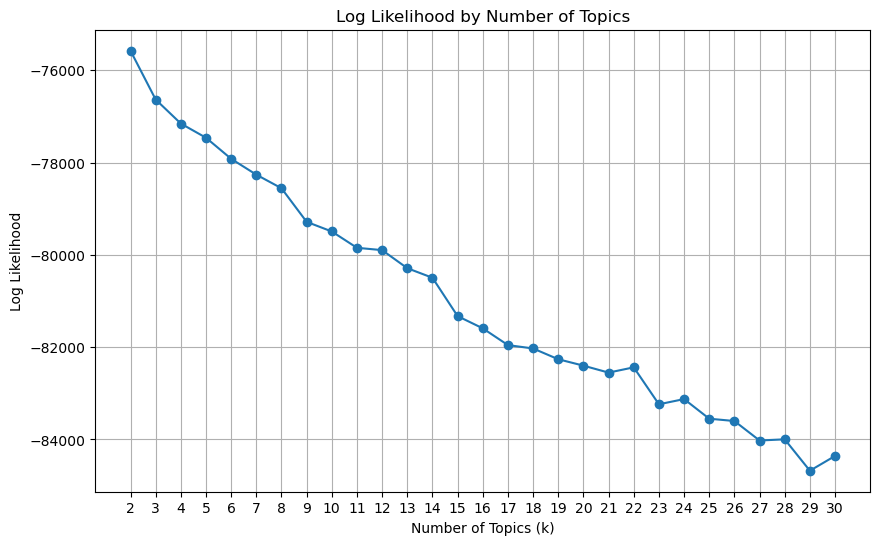

In [76]:
#log likekihood
# Function to create a Document-Term Matrix
def create_dtm(text_data, max_df=0.70, min_df=8, stop_words='english'):
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=stop_words)
    return vectorizer.fit_transform(text_data), vectorizer

# Create the DTM using the cleaned text from the entire dataset
doc_term_matrix, vectorizer = create_dtm(Excellent_reviews['cleaned_text'])
def compute_log_likelihood(doc_term_matrix, max_topics=30, start=4):
    log_likelihoods = []
    for n_topics in range(start, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
        lda.fit(doc_term_matrix)
        log_likelihood = lda.score(doc_term_matrix)
        log_likelihoods.append(log_likelihood)
    return log_likelihoods 
# Call the function to compute log likelihoods for a range of topics
start = 2
max_topics = 30

log_likelihoods = compute_log_likelihood(doc_term_matrix, max_topics, start)

# Option 1: Print log likelihoods for each number of topics
for n_topics, log_likelihood in zip(range(start, max_topics + 1), log_likelihoods):
    print(f"Topics: {n_topics}, Log Likelihood: {log_likelihood:.2f}")

# Option 2: Plot the log likelihoods for a visual comparison
plt.figure(figsize=(10, 6))
plt.plot(range(start, max_topics + 1), log_likelihoods, marker='o')
plt.xlabel("Number of Topics (k)")
plt.ylabel("Log Likelihood")
plt.title("Log Likelihood by Number of Topics")
plt.xticks(range(start, max_topics + 1))
plt.grid()
plt.show()

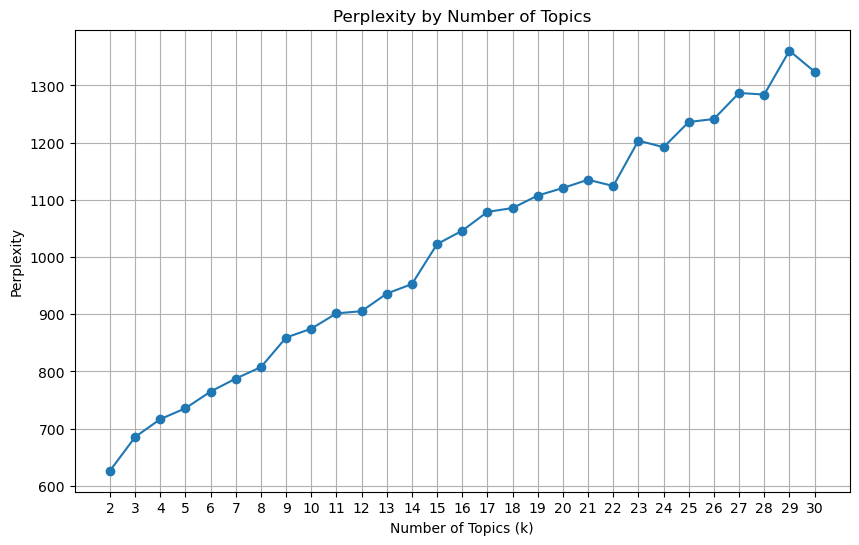

Topics: 2, Perplexity: 626.50
Topics: 3, Perplexity: 685.58
Topics: 4, Perplexity: 716.69
Topics: 5, Perplexity: 735.73
Topics: 6, Perplexity: 764.92
Topics: 7, Perplexity: 787.64
Topics: 8, Perplexity: 807.64
Topics: 9, Perplexity: 859.34
Topics: 10, Perplexity: 874.77
Topics: 11, Perplexity: 901.53
Topics: 12, Perplexity: 905.40
Topics: 13, Perplexity: 936.15
Topics: 14, Perplexity: 952.80
Topics: 15, Perplexity: 1022.75
Topics: 16, Perplexity: 1046.10
Topics: 17, Perplexity: 1078.98
Topics: 18, Perplexity: 1085.72
Topics: 19, Perplexity: 1107.55
Topics: 20, Perplexity: 1120.71
Topics: 21, Perplexity: 1135.21
Topics: 22, Perplexity: 1124.20
Topics: 23, Perplexity: 1203.58
Topics: 24, Perplexity: 1192.06
Topics: 25, Perplexity: 1236.08
Topics: 26, Perplexity: 1241.35
Topics: 27, Perplexity: 1286.83
Topics: 28, Perplexity: 1284.05
Topics: 29, Perplexity: 1360.68
Topics: 30, Perplexity: 1324.09


In [78]:
#perplexity 
#nuevo 
# Function to create a Document-Term Matrix
def create_dtm(text_data, max_df=0.70, min_df=8, stop_words='english'):
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=stop_words)
    return vectorizer.fit_transform(text_data), vectorizer

# Create the DTM using the cleaned text from the entire dataset
doc_term_matrix, vectorizer = create_dtm(Excellent_reviews['cleaned_text'])

# Function to compute perplexity
def compute_perplexity(doc_term_matrix, max_topics=30, start=2):
    perplexities = []
    
    for n_topics in range(start, max_topics + 1):
        lda = LatentDirichletAllocation(n_components=n_topics, random_state=0)
        lda.fit(doc_term_matrix)
        perplexity = lda.perplexity(doc_term_matrix)
        perplexities.append(perplexity)
    
    return perplexities

# Compute perplexity for a range of topics
start = 2
max_topics = 30
perplexities = compute_perplexity(doc_term_matrix, max_topics, start)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(start, max_topics + 1), perplexities, marker='o')
plt.xlabel("Number of Topics (k)")
plt.ylabel("Perplexity")
plt.title("Perplexity by Number of Topics")
plt.xticks(range(start, max_topics + 1))
plt.grid()
plt.show()

# Optional: Print perplexity values
for n_topics, perplexity in zip(range(start, max_topics + 1), perplexities):
    print(f"Topics: {n_topics}, Perplexity: {perplexity:.2f}")


Topic modeling

Topic 1:
['make', 'death', 'black', 'time', 'account', 'home', 'journey', 'future', 'past', 'day', 'star', 'war']


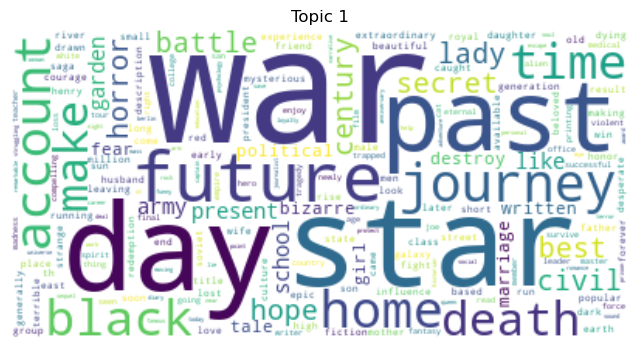

Topic 2:
['best', 'good', 'time', 'heart', 'big', 'murder', 'tale', 'girl', 'york', 'society', 'house', 'love']


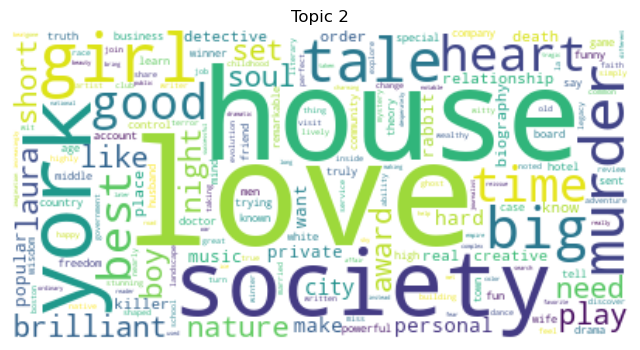

Topic 3:
['father', 'magic', 'death', 'love', 'woman', 'school', 'printing', 'old', 'dark', 'lord', 'king', 'harry']


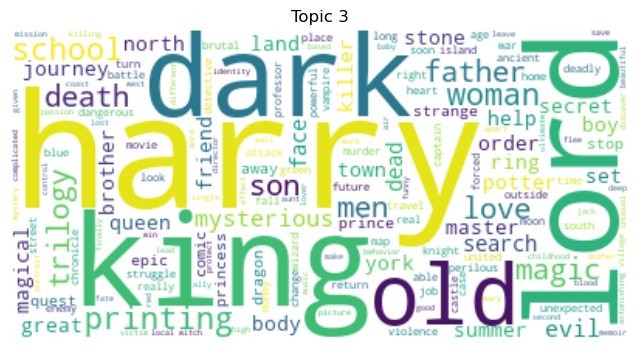

Topic 4:
['turn', 'beloved', 'set', 'wife', 'vampire', 'beauty', 'god', 'beautiful', 'great', 'color', 'woman', 'living']


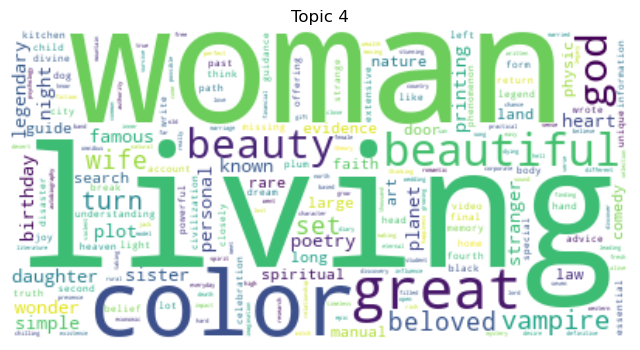

Topic 5:
['language', 'major', 'great', 'modern', 'art', 'political', 'important', 'introduction', 'writing', 'guide', 'philosophy', 'work']


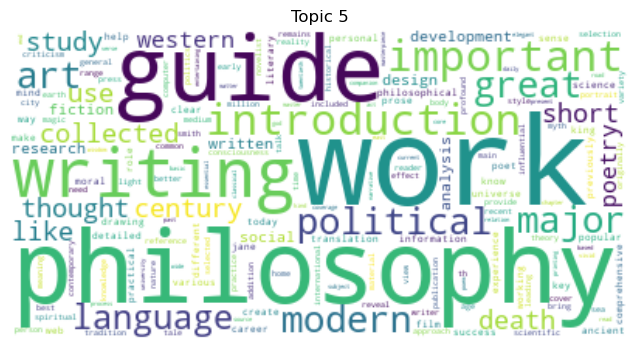

Topic 6:
['character', 'guide', 'help', 'best', 'culture', 'art', 'text', 'historical', 'literature', 'study', 'love', 'modern']


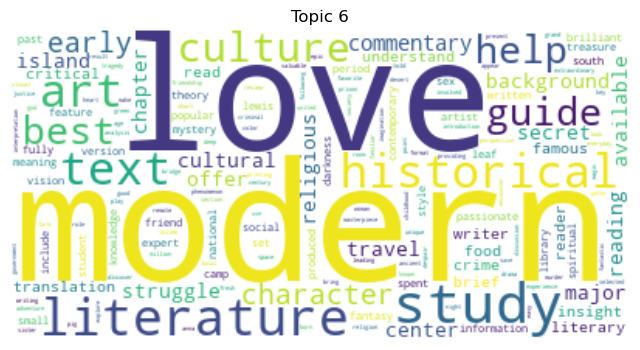

In [124]:
# Step 1: Create the document-term matrix
def create_dtm(text_data, max_df=0.70, min_df=8, stop_words='english'):
    vectorizer = CountVectorizer(max_df=max_df, min_df=min_df, stop_words=stop_words)
    return vectorizer.fit_transform(text_data), vectorizer

# Assuming 'demo_cleaned' contains your cleaned text in 'cleaned_text' column
doc_term_matrix, vectorizer = create_dtm(demo_cleaned['cleaned_text'])
# Set optimal_k based on your analysis (e.g., 3 or any other number you choose)
optimal_k = 6

# Create and fit the LDA model
lda_model = LatentDirichletAllocation(n_components=optimal_k, random_state=42)
lda_model.fit(doc_term_matrix)  # Ensure doc_term_matrix is defined in your previous code

# Generate Word Clouds for each topic
for index, topic in enumerate(lda_model.components_):
    print(f"Topic {index + 1}:")
    
    # Get the top words' indices
    top_word_indices = topic.argsort()[-12:]  # Top 12 word indices in the topic
    
    # Ensure indices are within bounds
    top_word_indices = top_word_indices[top_word_indices < len(vectorizer.get_feature_names_out())]
    
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_word_indices]
    print(top_words)

    # Create and display the word cloud
    word_freq = dict(zip(vectorizer.get_feature_names_out(), topic))
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(word_freq)
    
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Topic {index + 1}")
    plt.show()

Topic 1: Sci-Fi and War


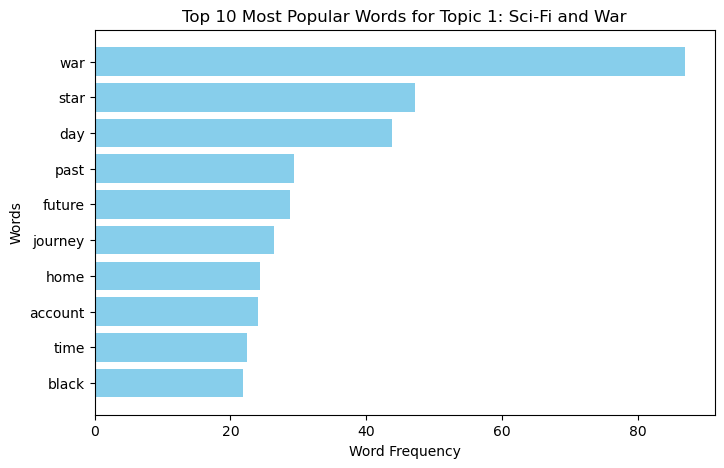

Topic 2: Romance and Mystery


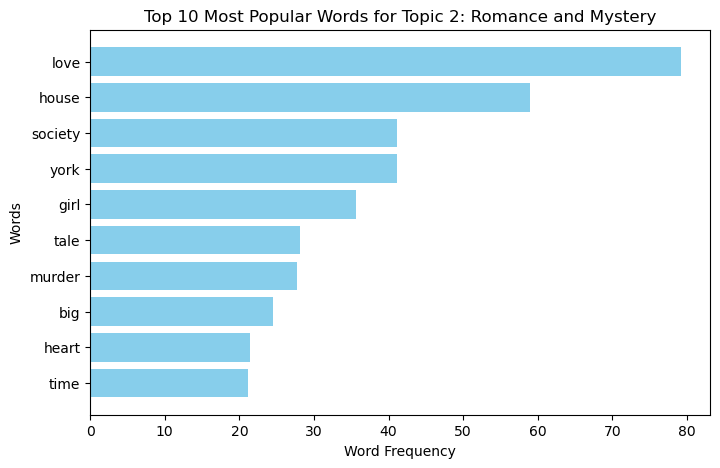

Topic 3: Fantasy


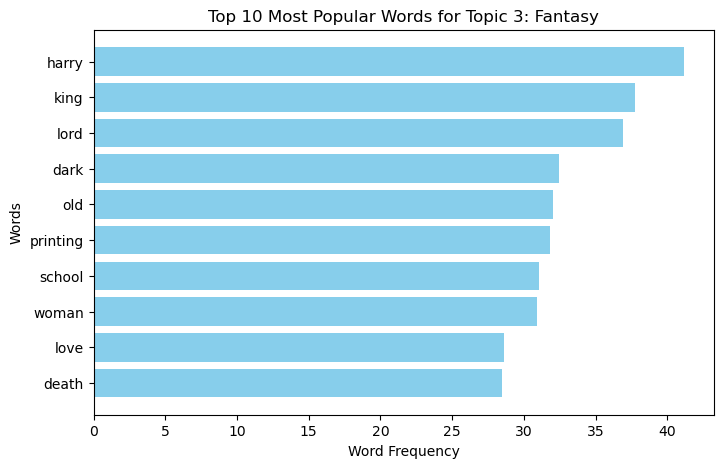

Topic 4: Supernatural love


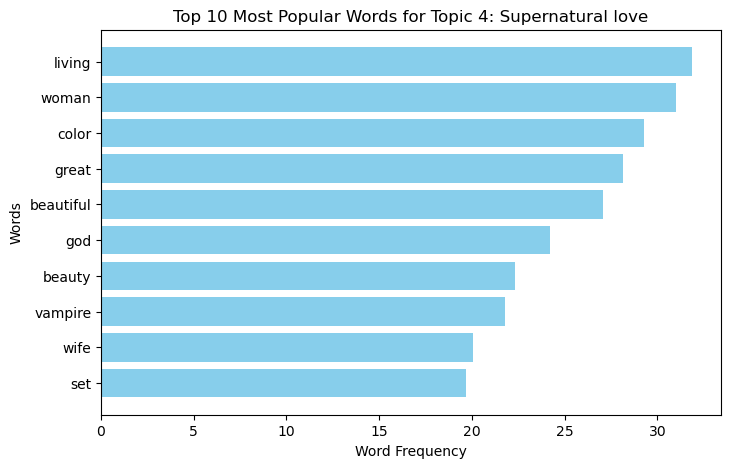

Topic 5: Political and Artistic Discourse


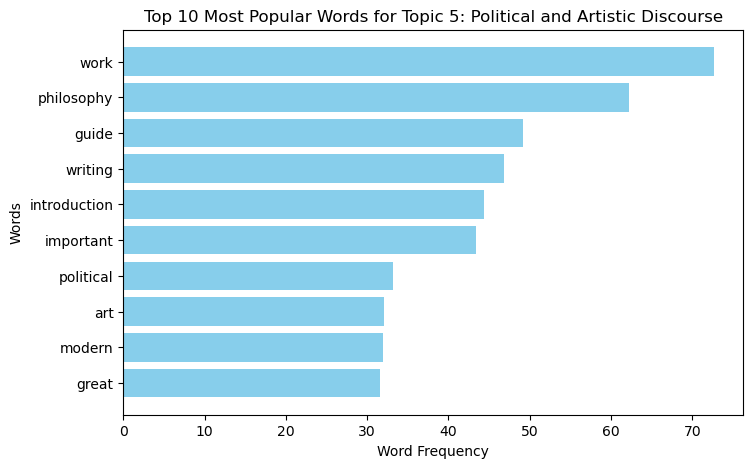

Topic 6: Love, Struggle and Modern Culture


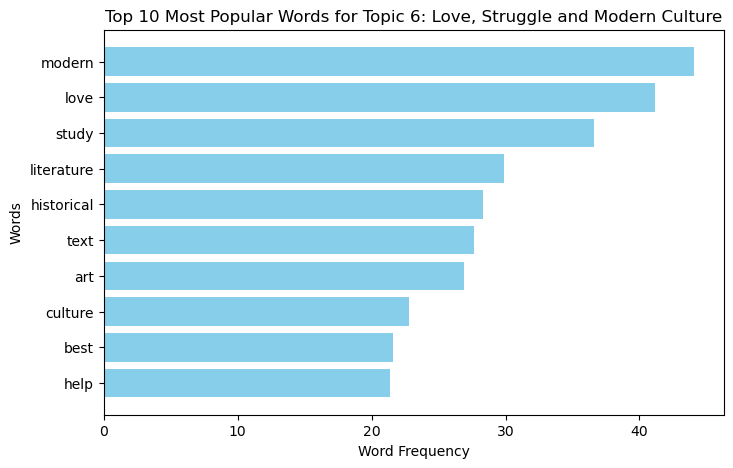

In [125]:
# Adding labells to each topic
topic_labels = [
    'Topic 1: Sci-Fi and War',
    'Topic 2: Romance and Mystery',
    'Topic 3: Fantasy',
    'Topic 4: Supernatural love',
    'Topic 5: Political and Artistic Discourse',
    'Topic 6: Love, Struggle and Modern Culture'
]

# Display the top 10 words for each topic and their frequencies 
for index, topic in enumerate(lda_model.components_):
    print(f"{topic_labels[index]}")  # Use the topic label instead of just the topic number
    
    top_words_indices = topic.argsort()[-10:]  # Get the indices of the top 10 words for the topic
    top_words = [vectorizer.get_feature_names_out()[i] for i in top_words_indices]
    top_words_values = [topic[i] for i in top_words_indices]  # Get the word frequency values
    
    # Plot the bar chart for the top 10 words
    plt.figure(figsize=(8, 5))
    plt.barh(top_words, top_words_values, color='skyblue')
    plt.xlabel('Word Frequency')
    plt.ylabel('Words')
    plt.title(f"Top 10 Most Popular Words for {topic_labels[index]}")  # Use topic label in the title
    plt.show()


Analyzing authors and categories column in both data1 and data2

In [86]:
#removing "authors" from the categories column for better analysis
# Function to filter out the category "authors"
def remove_authors(categories):
    if isinstance(categories, str):
        # Split the categories and filter out "authors"
        filtered_categories = [cat.strip() for cat in categories.split(',') if cat.strip().lower() != 'authors']
        return ', '.join(filtered_categories)  # Join back into a string
    return categories  # Return unchanged if not a string

# Apply the function to the categories column
demo_cleaned['categories'] = demo_cleaned['categories'].apply(remove_authors)

# Check the result
print(demo_cleaned['categories'].head(10))


0                   Philosophy
1              Conduct of life
2                      Fiction
3      Comics & Graphic Novels
4                      Fiction
5    Biography & Autobiography
6    Biography & Autobiography
7             Juvenile Fiction
8                      Fiction
9                        Humor
Name: categories, dtype: object


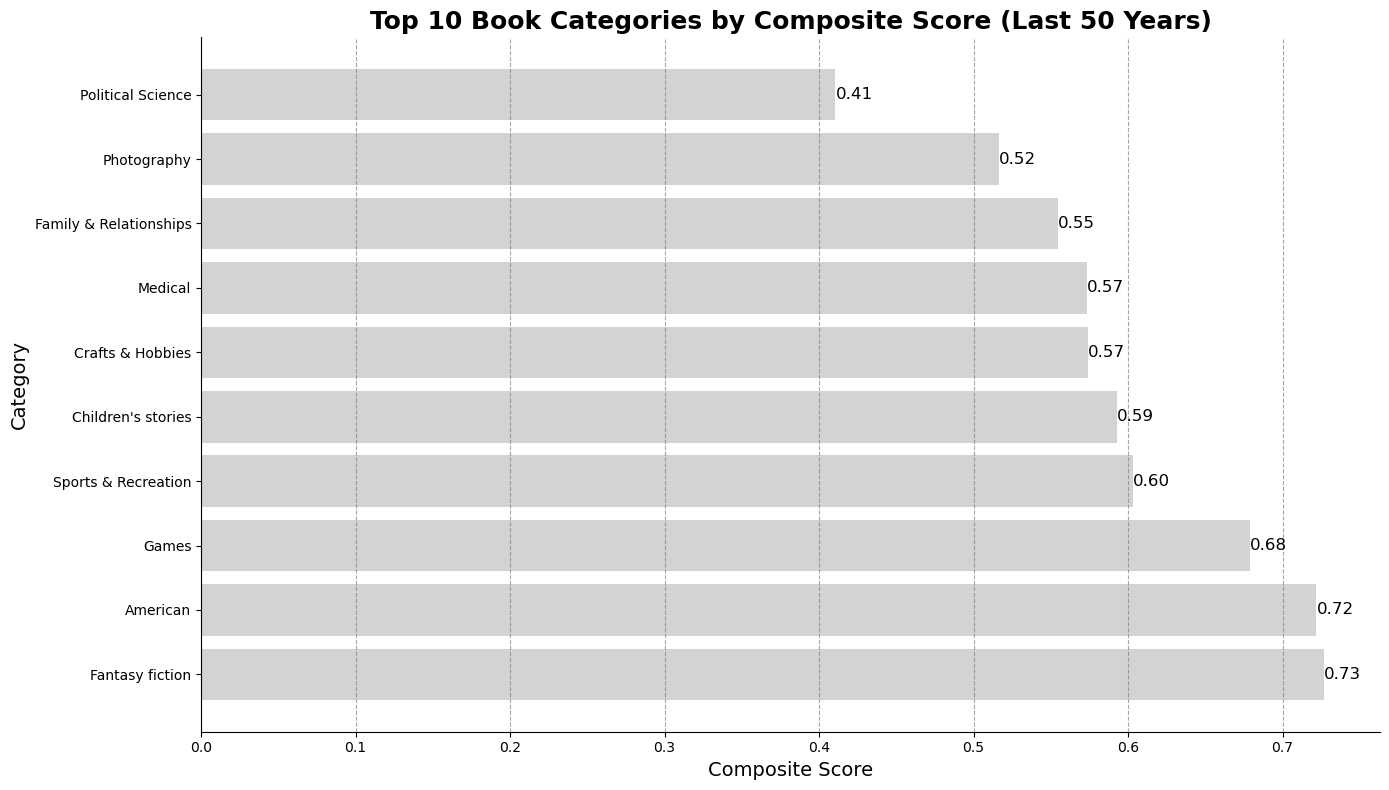

Top 10 categories by composite score (minimum 5 books):
Fantasy fiction: 0.73 (Books: 8.0, Total Ratings: 570,853.0)
American: 0.72 (Books: 8.0, Total Ratings: 6,628.0)
Games: 0.68 (Books: 8.0, Total Ratings: 337.0)
Sports & Recreation: 0.60 (Books: 5.0, Total Ratings: 55,841.0)
Children's stories: 0.59 (Books: 7.0, Total Ratings: 37,277.0)
Crafts & Hobbies: 0.57 (Books: 5.0, Total Ratings: 114.0)
Medical: 0.57 (Books: 7.0, Total Ratings: 17,870.0)
Family & Relationships: 0.55 (Books: 7.0, Total Ratings: 26,442.0)
Photography: 0.52 (Books: 5.0, Total Ratings: 2,456.0)
Political Science: 0.41 (Books: 7.0, Total Ratings: 16,127.0)


In [90]:
#Calculating and ploting the best categories over the last 50 years based on average rating
current_year = 2024
data_filtered = demo_cleaned[demo_cleaned['published_year'] >= (current_year - 50)]

# Function to split categories and explode the DataFrame
def split_categories(row):
    if isinstance(row['categories'], str):
        return pd.Series([cat.strip() for cat in row['categories'].split(',')])
    return pd.Series([])

# Explode the categories
categories_exploded = data_filtered.apply(split_categories, axis=1).stack()
categories_exploded = categories_exploded.reset_index(level=1, drop=True)
categories_exploded.name = 'category'

# Combine with original data
data_categories = data_filtered.drop('categories', axis=1).join(categories_exploded)

# Group by category and calculate metrics
category_metrics = data_categories.groupby('category').agg({
    'average_rating': ['median', 'count'],
    'ratings_count': 'sum'
})

category_metrics.columns = ['avg_rating', 'book_count', 'total_ratings']

# Function to remove outliers using IQR
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers from average_rating and book_count
category_metrics = remove_outliers_iqr(category_metrics, 'avg_rating')
category_metrics = remove_outliers_iqr(category_metrics, 'book_count')

# Normalize the average rating
category_metrics['normalized_rating'] = (category_metrics['avg_rating'] - category_metrics['avg_rating'].min()) / \
                                        (category_metrics['avg_rating'].max() - category_metrics['avg_rating'].min())

# Calculate normalized book count (between 0 and 1)
category_metrics['normalized_book_count'] = (category_metrics['book_count'] - category_metrics['book_count'].min()) / \
                                            (category_metrics['book_count'].max() - category_metrics['book_count'].min())

# Define weights for the composite score
weight_avg_rating = 0.7  # Weight for the normalized average rating
weight_book_count = 0.3   # Weight for the normalized book count

# Calculate composite score with weighted average
category_metrics['composite_score'] = (category_metrics['normalized_rating'] * weight_avg_rating) + \
                                       (category_metrics['normalized_book_count'] * weight_book_count)

# Set minimum book count (e.g., 5 books)
min_book_count = 5

# Filter categories with at least the minimum book count
top_categories = category_metrics[category_metrics['book_count'] >= min_book_count]

# Sort by composite score
top_categories_sorted = top_categories.sort_values('composite_score', ascending=False)

# Select top 10 categories
top_10_categories = top_categories_sorted.head(10)

# Create the horizontal bar chart
plt.figure(figsize=(14, 8))  # Increased figure size
bars = plt.barh(top_10_categories.index, top_10_categories['composite_score'], 
                color='lightgray')  # Set the bar color to light gray
# Customize the chart
plt.title('Top 10 Book Categories by Composite Score (Last 50 Years)', fontsize=18, fontweight='bold')
plt.xlabel('Composite Score', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=12, color='black')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a light grid with darker lines
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print the results
print("Top 10 categories by composite score (minimum {} books):".format(min_book_count))
for category, metrics in top_10_categories.iterrows():
    print(f"{category}: {metrics['composite_score']:.2f} (Books: {metrics['book_count']}, Total Ratings: {metrics['total_ratings']:,})")
#highligh: Children's stories, fantasy fiction

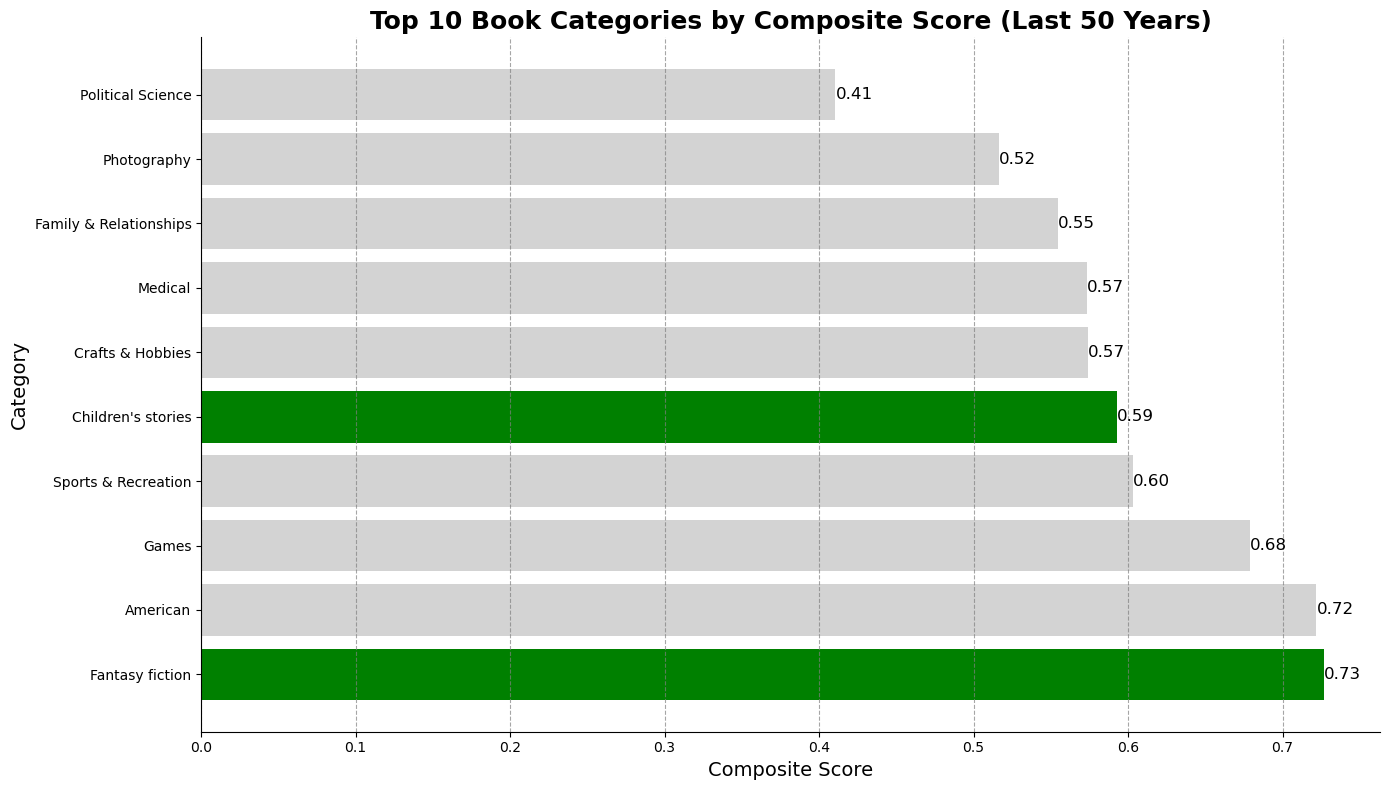

Top 10 categories by composite score (minimum 5 books):
Fantasy fiction: 0.73 (Books: 8.0, Total Ratings: 570,853.0)
American: 0.72 (Books: 8.0, Total Ratings: 6,628.0)
Games: 0.68 (Books: 8.0, Total Ratings: 337.0)
Sports & Recreation: 0.60 (Books: 5.0, Total Ratings: 55,841.0)
Children's stories: 0.59 (Books: 7.0, Total Ratings: 37,277.0)
Crafts & Hobbies: 0.57 (Books: 5.0, Total Ratings: 114.0)
Medical: 0.57 (Books: 7.0, Total Ratings: 17,870.0)
Family & Relationships: 0.55 (Books: 7.0, Total Ratings: 26,442.0)
Photography: 0.52 (Books: 5.0, Total Ratings: 2,456.0)
Political Science: 0.41 (Books: 7.0, Total Ratings: 16,127.0)


In [92]:
#highliting the categories tha matches the other data
# Create the horizontal bar chart with category-specific colors
plt.figure(figsize=(14, 8))  # Increased figure size

# Assign colors based on the category name
colors = ['green' if category in ['Children\'s stories', 'Fantasy fiction'] else 'lightgray' 
          for category in top_10_categories.index]

bars = plt.barh(top_10_categories.index, top_10_categories['composite_score'], color=colors)  # Set color conditionally

# Customize the chart
plt.title('Top 10 Book Categories by Composite Score (Last 50 Years)', fontsize=18, fontweight='bold')
plt.xlabel('Composite Score', fontsize=14)
plt.ylabel('Category', fontsize=14)

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=12, color='black')

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a light grid with darker lines
plt.grid(axis='x', linestyle='--', alpha=0.7, color='gray')

# Adjust layout and display
plt.tight_layout()
plt.show()

# Print the results and highlight specific categories
print("Top 10 categories by composite score (minimum {} books):".format(min_book_count))
for category, metrics in top_10_categories.iterrows():
    if category in ["Children's stories", "Fantasy fiction"]:
        print(f"\033[92m{category}: {metrics['composite_score']:.2f} (Books: {metrics['book_count']}, Total Ratings: {metrics['total_ratings']:,})\033[0m")  # Highlight in green
    else:
        print(f"{category}: {metrics['composite_score']:.2f} (Books: {metrics['book_count']}, Total Ratings: {metrics['total_ratings']:,})")


In [98]:
# Load Data2
data2 = pd.read_csv('Top-100 Trending Books.csv')
(data2.head(2))

,Rank,book title,book price,rating,author,year of publication,genre,url
0,1,"Iron Flame (The Empyrean, 2)",18.42,4.1,Rebecca Yarros,2023,Fantasy Romance,amazon.com/Iron-Flame-Empyrean-Rebecca-Yarros/...
1,2,The Woman in Me,20.93,4.5,Britney Spears,2023,Memoir,amazon.com/Woman-Me-Britney-Spears/dp/16680090...


In [100]:
#Cleaning Data2
# Rename columns for consistency
data2.columns = data2.columns.str.lower().str.replace(' ', '_')

# Handle missing values in 'rating'
data2['rating'] = pd.to_numeric(data2['rating'], errors='coerce')
data2['rating'].fillna(data2['rating'].median(), inplace=True)

# Convert 'year_of_publication' to integer
data2['year_of_publication'] = pd.to_numeric(data2['year_of_publication'], errors='coerce').astype('Int64')

# Fill missing values in 'genre' with 'Unknown'
data2['genre'].fillna('Unknown', inplace=True)

# Drop rows where 'author' or 'rating' is missing
data2 = data2.dropna(subset=['author', 'rating'])

# Convert 'book_price' to numeric, handling potential non-numeric values
data2['book_price'] = pd.to_numeric(data2['book_price'].astype(str).str.replace('$', ''), errors='coerce') 

# Check for any remaining missing values
print(data2.isnull().sum())

rank                   0
book_title             0
book_price             0
rating                 0
author                 0
year_of_publication    0
genre                  0
url                    0
dtype: int64


C:\Users\shalo\AppData\Local\Temp\ipykernel_17376\2174597876.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data2['rating'].fillna(data2['rating'].median(), inplace=True)
C:\Users\shalo\AppData\Local\Temp\ipykernel_17376\2174597876.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a

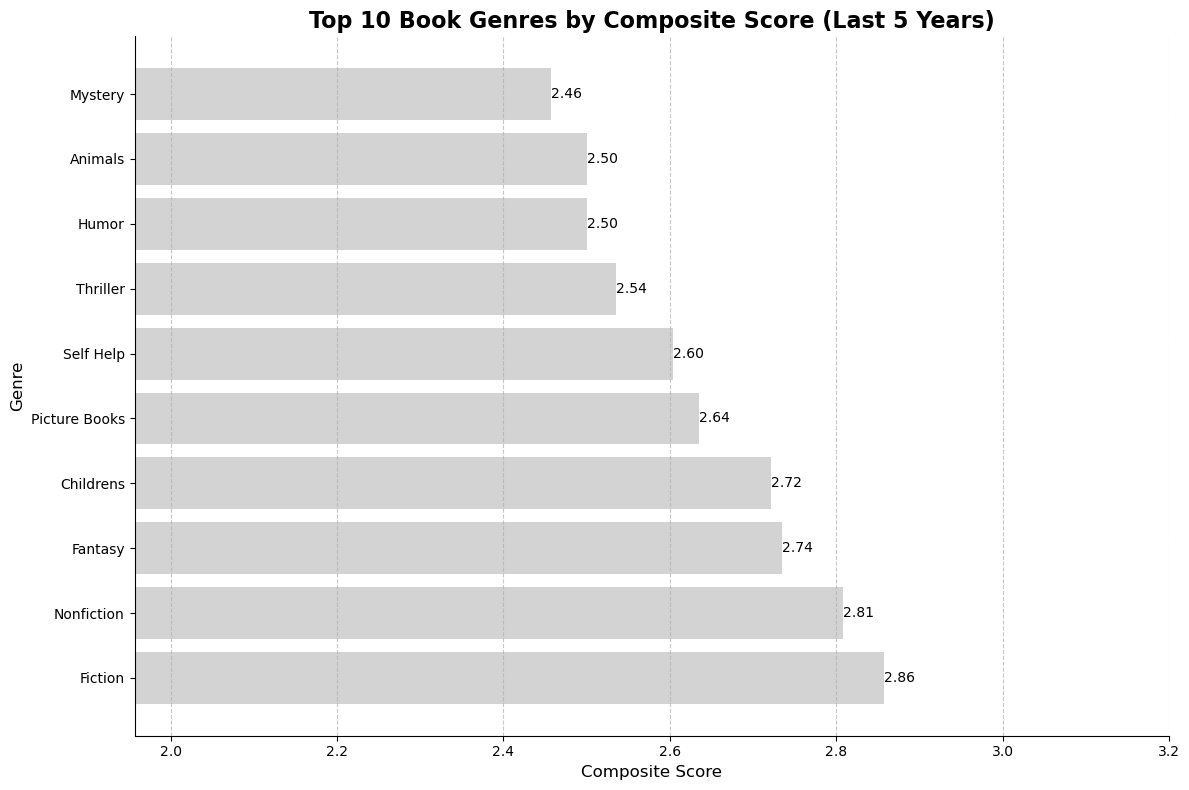

In [102]:
#extracting the top 10 genres of this dataset from the last 5 years based on rating
import seaborn as sns
data2['year_of_publication'] = pd.to_numeric(data2['year_of_publication'], errors='coerce')

# Filter data for the last 5 years
current_year = 2024
data_filtered = data2[data2['year_of_publication'] >= (current_year - 5)]

# Function to split genres
def split_genres(row):
    if isinstance(row['genre'], str):
        return pd.Series([genre.strip() for genre in row['genre'].split(',')])
    return pd.Series([])

# Explode the genres
genres_exploded = data_filtered.apply(split_genres, axis=1).stack()
genres_exploded = genres_exploded.reset_index(level=1, drop=True)
genres_exploded.name = 'genre'

# Combine with original data
data_genres = data_filtered.drop('genre', axis=1).join(genres_exploded)

# Group by genre and calculate metrics
genre_metrics = data_genres.groupby('genre').agg({
    'rating': ['mean', 'count'],
    'rank': 'count'  # Using rank as a proxy for popularity
})

genre_metrics.columns = ['avg_rating', 'book_count', 'popularity']

# Calculate weighted average rating
genre_metrics['weighted_avg_rating'] = (genre_metrics['avg_rating'] * genre_metrics['popularity']) / genre_metrics['popularity']

# Normalize popularity
genre_metrics['normalized_popularity'] = (genre_metrics['popularity'] - genre_metrics['popularity'].min()) / (genre_metrics['popularity'].max() - genre_metrics['popularity'].min())

# Calculate composite score (50% weighted average rating, 50% normalized popularity)
genre_metrics['composite_score'] = 0.5 * genre_metrics['weighted_avg_rating'] + 0.5 * genre_metrics['normalized_popularity']

# Set minimum book count
min_book_count = 2

# Filter genres with at least the minimum book count
top_genres = genre_metrics[genre_metrics['book_count'] >= min_book_count]

# Sort by composite score
top_genres_sorted = top_genres.sort_values('composite_score', ascending=False)

# Select top 10 genres
top_10_genres = top_genres_sorted.head(10)

# Create the horizontal bar chart with improved distribution
plt.figure(figsize=(12, 8))

# Set the range for the x-axis to end at 3.50
x_min = top_10_genres['composite_score'].min() - 0.5
x_max = 3.2  # Limit the x-axis to 3.2 for better visual representation

bars = plt.barh(top_10_genres.index, top_10_genres['composite_score'], 
                color='lightgray')  # Use a neutral color

# Customize the chart
plt.title('Top 10 Book Genres by Composite Score (Last 5 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Set the x-axis limits for better bar distribution
plt.xlim(x_min, x_max)

# Increase the space between bars
plt.gca().set_yticks([i for i in range(len(top_10_genres.index))])
plt.gca().set_yticklabels(top_10_genres.index, fontsize=10)

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=10)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a light grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


#highlight: Childrens, Fantasy, Self-help, 

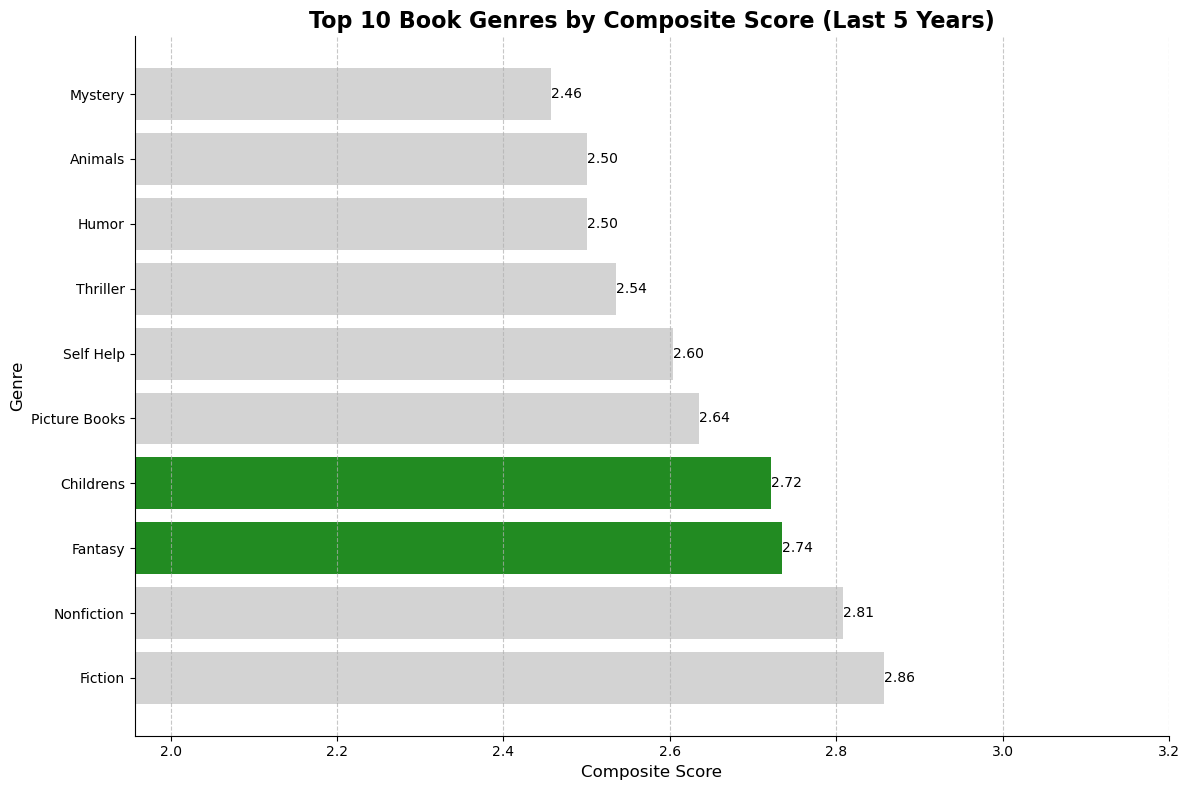

In [104]:
#highliting the categories tha matches the other data
# Create the horizontal bar chart with genre-specific colors
plt.figure(figsize=(12, 8))

# Set the range for the x-axis to end at 3.50
x_min = top_10_genres['composite_score'].min() - 0.5
x_max = 3.2  # Limit the x-axis to 3.2 for better visual representation

# Assign colors based on the genre name
colors = ['#228B22' if genre in ['Childrens', 'Fantasy', 'Self-help'] else 'lightgray' 
          for genre in top_10_genres.index]

bars = plt.barh(top_10_genres.index, top_10_genres['composite_score'], 
                color=colors)  # Set color conditionally

# Customize the chart
plt.title('Top 10 Book Genres by Composite Score (Last 5 Years)', fontsize=16, fontweight='bold')
plt.xlabel('Composite Score', fontsize=12)
plt.ylabel('Genre', fontsize=12)

# Set the x-axis limits for better bar distribution
plt.xlim(x_min, x_max)

# Increase the space between bars
plt.gca().set_yticks([i for i in range(len(top_10_genres.index))])
plt.gca().set_yticklabels(top_10_genres.index, fontsize=10)

# Add value labels to the end of each bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, f'{width:.2f}',
             ha='left', va='center', fontsize=10)

# Remove top and right spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a light grid
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()


In [106]:
#Analysis of authors in the Book dasatet 1
# Drop rows where 'authors' or 'average_rating' is missing in the 'demo' dataset
authors_ratings_demo = demo.dropna(subset=['authors', 'average_rating'])

# Split the 'authors' column by ';' and use .loc[] to modify the DataFrame in place
authors_ratings_demo.loc[:, 'authors'] = authors_ratings_demo['authors'].str.split(';')

# Explode the authors to get one row per author per book
authors_ratings_demo = authors_ratings_demo.explode('authors')

# Strip any extra whitespace around author names
authors_ratings_demo.loc[:, 'authors'] = authors_ratings_demo['authors'].str.strip()

# Group by 'authors' and calculate the average rating for each author
author_avg_ratings_demo = authors_ratings_demo.groupby('authors')['average_rating'].mean().reset_index()

# Sort by average rating to find the top-rated authors
top_authors_by_rating_demo = author_avg_ratings_demo.sort_values(by='average_rating', ascending=False).head(10)

# Display the top 10 authors based on average rating
print(top_authors_by_rating_demo)

                authors  average_rating
578          Ian Martin            5.00
829       Katie Elliott            5.00
836       Keith Donohue            5.00
1253  Robert McL Wilson            5.00
1341    Simon Cleveland            4.91
338   Donald W. Burdick            4.70
840   Kenneth L. Barker            4.70
133      Bill Watterson            4.69
878         Leo Bersani            4.68
550         Henry James            4.68


In [116]:
#Top 10 Authors in Book Dataset 1
# Create a list of lists for the table
table_data_1 = top_authors_by_rating_demo[['authors', 'average_rating']].values.tolist()

# Print the title for the table
# Print the table using tabulate
print("Top 10 Authors by Average Rating in Book Dataset 1")
print(tabulate(table_data_1, headers=['Author', 'Average Rating'], tablefmt='grid'))

Top 10 Authors by Average Rating in Book Dataset 1
+-------------------+------------------+
| Author            |   Average Rating |
+===================+==================+
| Ian Martin        |             5    |
+-------------------+------------------+
| Katie Elliott     |             5    |
+-------------------+------------------+
| Keith Donohue     |             5    |
+-------------------+------------------+
| Robert McL Wilson |             5    |
+-------------------+------------------+
| Simon Cleveland   |             4.91 |
+-------------------+------------------+
| Donald W. Burdick |             4.7  |
+-------------------+------------------+
| Kenneth L. Barker |             4.7  |
+-------------------+------------------+
| Bill Watterson    |             4.69 |
+-------------------+------------------+
| Leo Bersani       |             4.68 |
+-------------------+------------------+
| Henry James       |             4.68 |
+-------------------+------------------+


In [118]:
#Analysis of the authors in Book Dataset 2
# Split the 'author' column by ',' to handle multiple authors in a single entry
data2['author'] = data2['author'].str.split(',')

# Explode the 'author' column to get one row per author
data2 = data2.explode('author')

# Strip any extra whitespace around author names
data2['author'] = data2['author'].str.strip()

# Sort the books by 'rating' in descending order
data2 = data2.sort_values(by='rating', ascending=False)

# Group by 'author' and take the top 2 books for each author
top_books_by_author = data2.groupby('author').head(2)

# Calculate the average rating for each author, considering up to 2 books per author
author_avg_ratings = top_books_by_author.groupby('author').agg(
    num_books=('book_title', 'count'),  # Count of books
    avg_rating=('rating', 'mean')  # Average rating
).reset_index()

# Sort the authors by average rating in descending order and get the top 20
top_10_authors = author_avg_ratings.sort_values(by='avg_rating', ascending=False).head(10)

# Display the result
print(top_10_authors)

                   author  num_books  avg_rating
53       Michael Connelly          1         5.0
85          duopress labs          1         4.9
14        Bill Martin Jr.          2         4.9
49    Margaret Wise Brown          1         4.9
44           Julissa Mora          1         4.9
68           Rose Rossner          1         4.9
41       John Archambault          1         4.9
36           J.K. Rowling          2         4.9
28  Emily Winfield Martin          1         4.9
76   Sherri Duskey Rinker          1         4.9


In [120]:
#Table of top 10 Authors with best rating in the Book Dataset 2
# Create a list of lists for the table
table_data_2 = top_10_authors[['author', 'num_books', 'avg_rating']].values.tolist()

# Print the table using tabulate
print(tabulate(table_data_2, headers=['Author', 'Number of Books', 'Average Rating'], tablefmt='grid'))

+-----------------------+-------------------+------------------+
| Author                |   Number of Books |   Average Rating |
+=======================+===================+==================+
| Michael Connelly      |                 1 |              5   |
+-----------------------+-------------------+------------------+
| duopress labs         |                 1 |              4.9 |
+-----------------------+-------------------+------------------+
| Bill Martin Jr.       |                 2 |              4.9 |
+-----------------------+-------------------+------------------+
| Margaret Wise Brown   |                 1 |              4.9 |
+-----------------------+-------------------+------------------+
| Julissa Mora          |                 1 |              4.9 |
+-----------------------+-------------------+------------------+
| Rose Rossner          |                 1 |              4.9 |
+-----------------------+-------------------+------------------+
| John Archambault      |